In [1]:
from main import *

In [2]:
a = ScData("01_1")

Preparing the folders for the results.
Current System Path Changed to : C:\Users\mmusavi\Desktop\Code\CryPy\
Folder <01_1_DataOutPut> created.
                        name
0  Data\15x15x2_8_imagem.cam
Select your data by index :
analysing  15x15x2_8
mean background is = 2677.25
Background STD = 374.72


In [3]:
%matplotlib
a.take_molecules()
## [83] [69]

Using matplotlib backend: Qt5Agg
[82] [70]


Plotting 1 molecules spectrum...
All molecules fluorescence trace saved in the CSV file.
 Data now contains the molecules ...


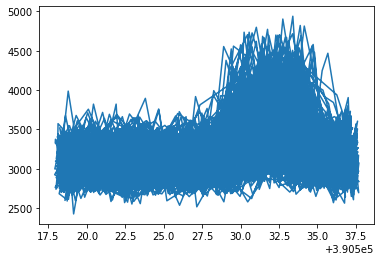

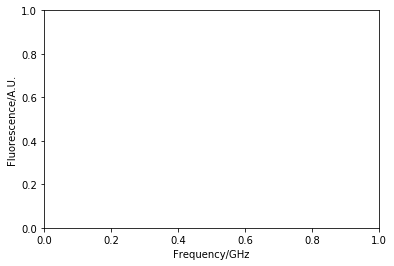

In [4]:
%matplotlib inline
a.add_mol_spec()
a.plot_mols()

Using matplotlib backend: Qt5Agg


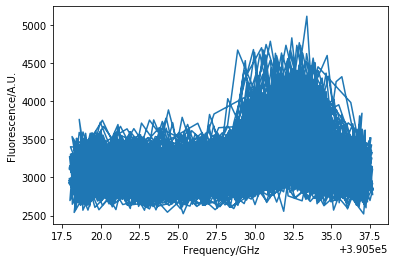

In [9]:
%matplotlib
a.plot_mols()

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [14]:
# %matplotlib inline

interact(a.plot_Diffusion, df = widgets.FloatSlider(min=0.01,max = 2, value= 0.5), dt = widgets.FloatSlider(min = 0.4, max = 10, value= 5))

interactive(children=(Text(value='mol0', description='molecule'), FloatSlider(value=0.5, description='df', max…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

mapping the spectral diffusion
Image is 200x44
mapping the spectral diffusion
Image is 200x44
mapping the spectral diffusion
Image is 200x44
mapping the spectral diffusion
Image is 200x44
mapping the spectral diffusion
Image is 200x44
mapping the spectral diffusion
Image is 200x44
mapping the spectral diffusion
Image is 200x44
mapping the spectral diffusion
Image is 200x44
1.59 s ± 29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


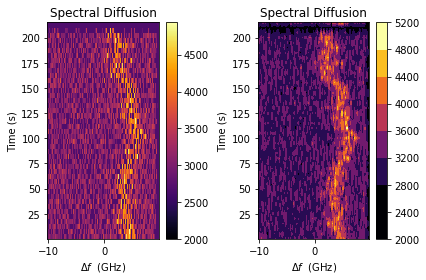

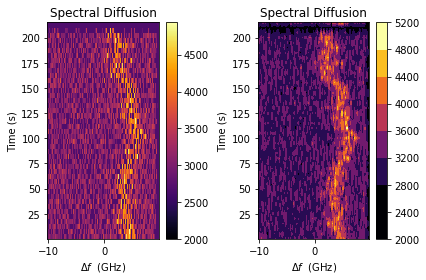

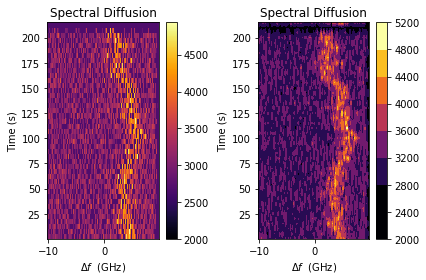

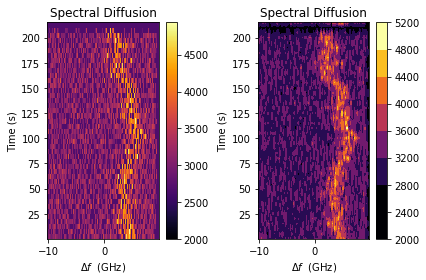

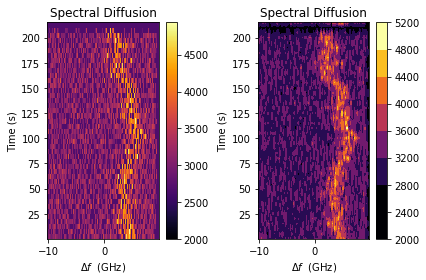

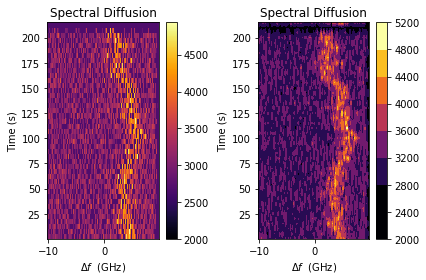

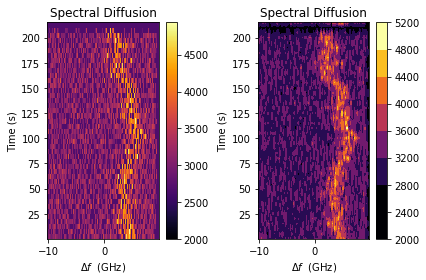

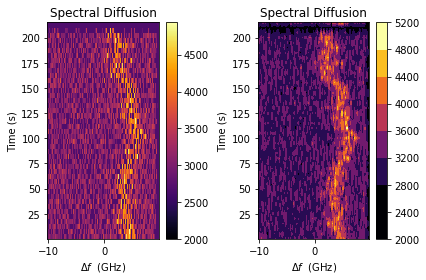

In [7]:
%timeit a.plot_Diffusion(df = 0.1, dt = 5)


##### Upto now We have a normal diffusion map. We will extract every line and fit them with a lorentzian profile.
##### took 1.59 sec for 200x44 image

In [9]:
1.59/(200*44)

0.0001806818181818182

In [60]:
def lorentzian(f, f0, BG , FWHM, A):
    a = FWHM**2 /2
    L = BG + A* a/(a+(f-f0)**2)
    return L

Text(0.5, 1.0, 'Lorentzian Lineshape')

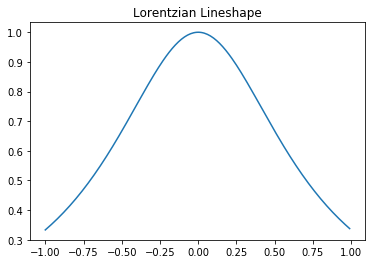

In [173]:
f= np.arange(-1,1,0.01)
plt.plot(f,lorentzian(f,0,0.2,1,1))
plt.title('Lorentzian Lineshape')


In [175]:
from scipy.optimize import curve_fit

In [251]:
def fit_line(f,fluo,A0 , gamma = 1, f0= 0, A1 = 1):
    popt, pcov = curve_fit(lorentzian, f, fluo, p0=[f0, A0 , gamma, A1], bounds= ([-15,0,0.1,1],[15,20000,8,1000]))
    fprime = np.arange(-10,10,0.01)
    print("fit values : ", popt)
    plt.plot(fprime,lorentzian(fprime, *popt))


In [10]:
# T = (a.data.ElapsedTime < 15) & (a.data.ElapsedTime>10)
data = a.data.copy()

In [11]:
data['f'] = (data['Frequency'] - data.Frequency.mean()) / 1e9
# data = data.sort_values(by=['f'])
# data.mol0 = data.mol0/data.mol0.max()
# data

fit values :  [1.65015614e+00 1.99434589e+04 8.00000000e+00 1.00000000e+00]


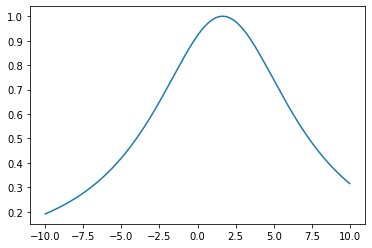

In [178]:
fit_line(data.f,data.mol0, A0=0, gamma = 2.5, f0=2.11,A1=1.1)

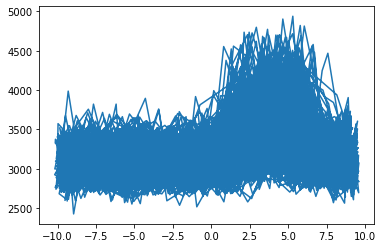

In [13]:
%matplotlib inline
plt.plot(data.f,data.mol0)

In [14]:
from lmfit.models import LorentzianModel, LinearModel
from lmfit import Parameters

In [53]:
model =  LorentzianModel()
params = Parameters()
params.add('amplitude', value=100)
params.add("center", value= 3)
params.add("sigma", value = 3, min=0.03, max=3.1)
# params.add('slope', value=0)
# params.add('intercept', value= 0.6)
data = data.sort_values(by=["f"])
T = (data.t >10) &  (data.t <20)
result = model.fit(data[T].mol0-data[T].mol0.mean(), params, x=data[T].f[:])

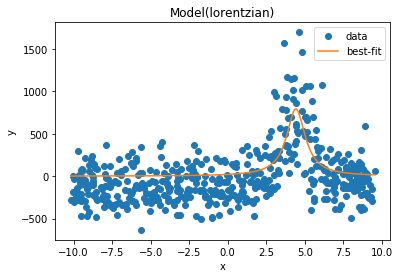

In [54]:
result.plot_fit()

In [55]:
print(result.fit_report())


[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 102
    # data points      = 493
    # variables        = 3
    chi-square         = 34206951.8
    reduced chi-square = 69810.1057
    Akaike info crit   = 5501.68313
    Bayesian info crit = 5514.28465
[[Variables]]
    amplitude:  1846.02159 +/- 160.142889 (8.68%) (init = 100)
    center:     4.42741850 +/- 0.06652179 (1.50%) (init = 3)
    sigma:      0.73966919 +/- 0.08952798 (12.10%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) =  0.694


In [96]:
from lmfit import Model
model = Model(lorentzian)
model.param_names
params = Parameters()
params.add('A', value=1000)
params.add("f0", value=3)
params.add("FWHM", value=2, min=0.03, max=6)
params.add('BG', value=3000, min=0, max=20000)

In [71]:
ld = data[T]
ld

,DAQ_Index,ElapsedTime,Frequency,rawFreq,t,mol0,f
703,703,14.340,3.905179e+14,3.905177e+14,14.347333,2926.0,-10.185931
667,667,13.604,3.905181e+14,3.905176e+14,13.619000,3016.8,-10.015478
739,739,15.059,3.905181e+14,3.905177e+14,15.073667,3204.8,-10.013424
811,811,16.514,3.905181e+14,3.905176e+14,16.529333,2922.2,-10.003421
883,883,17.970,3.905181e+14,3.905177e+14,17.985000,3172.4,-9.973488
...,...,...,...,...,...,...,...
978,978,19.942,3.905373e+14,3.905376e+14,19.927667,3100.8,9.224889
763,763,15.554,3.905374e+14,3.905374e+14,15.561000,2960.4,9.316946
871,871,17.748,3.905375e+14,3.905378e+14,17.755333,2906.6,9.376993
692,692,14.122,3.905375e+14,3.905376e+14,14.114667,3051.4,9.393849


In [97]:
result = model.fit(ld.mol0, params, f=ld.f)

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 47
    # data points      = 493
    # variables        = 4
    chi-square         = 28392046.3
    reduced chi-square = 58061.4444
    Akaike info crit   = 5411.82744
    Bayesian info crit = 5428.62948
[[Variables]]
    A:     895.901035 +/- 53.0808871 (5.92%) (init = 1000)
    f0:    4.38860033 +/- 0.06354518 (1.45%) (init = 3)
    FWHM:  1.52457190 +/- 0.14794409 (9.70%) (init = 2)
    BG:    3064.04681 +/- 15.1340066 (0.49%) (init = 3000)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, FWHM)  = -0.552
    C(FWHM, BG) = -0.525


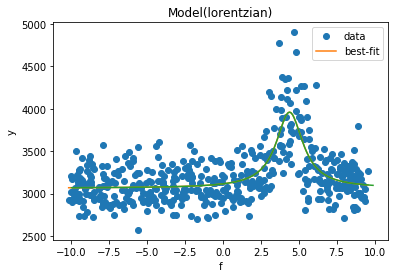

In [101]:
result.plot_fit()
print(result.fit_report())

plt.plot(np.arange(-10,10,0.1), model.eval( result.params, f= np.arange(-10,10,0.1)))

In [343]:
from functools import partial
def lorentzian(f, f0, gamma, A1): # gamma is the FWHM
    a = gamma**2 /2
    L = a/(a+(f-f0)**2)
    return L

In [210]:
def fit_Line(x,y):
    model = LinearModel() + LorentzianModel()
    params = Parameters()
    params.add('amplitude', value=100)
    params.add("center", value=3)
    params.add("sigma", value=0.4, min=0.03, max=3.1)
    params.add('slope', value=0)
    params.add('intercept', value=0.6)
    result = model.fit(y, params, x=x)
    return result


def fitted_Dif_map(data, mol='mol0', df=0.5, dt=1, molname='__', mean_BG='3000'):

    data['f'] = (data['Frequency'] - data.Frequency.mean()) / 1e9
    data.mol0 = data.mol0
    result = fit_Line(data.f,data.mol0)
    f= np.arange(-10,10,0.1)                                        ## making new equi-distance pixels. assumed to be GHz
    lor = partial(lorentzian, f0=result.params["center"].value,     ## feeding the fitted parameters
                  gamma=2 * result.params["sigma"].value, A1=1)
    plt.plot(f, lor(f))                                             ## lor is now the fitter lorentzian function

    dmap = np.zeros([f.size, 600], dtype=float)

    for t in range(20):
        T = (data.ElapsedTime >10*t) &  (data.ElapsedTime <10*t +10)
        ldata = data[T]
        result = fit_Line(ldata.f, ldata.mol0)
        lor = partial(lorentzian, f0=result.params["center"].value,  ## feeding the fitted parameters
                      gamma=2 * result.params["sigma"].value, A1=1)
        dmap[:,t]= lor(f)
    dmap = dmap.transpose()
    plt.imshow(dmap)

In [214]:
%timeit fitted_Dif_map(a.data)

3.67 s ± 89.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


first implementation. Now improving :

In [162]:
def fit_Line(f,y, model, params):
    model = Model(lorentzian)
    result = model.fit(y, params, f=f)
    return result.params

def fitted_Dif_map(data, mol='mol0', df=0.5, dt=1, molname='__', mean_BG='3000'):
    fmin = data.f.min()
    fmax = data.f.max()

    tmin = data.t.min()
    tmax = data.t.max()

    # %%
    f = np.arange(fmin, fmax + df, df)
    # t = np.arange(tmin, tmax + dt, dt)
    xpix = int((fmax - fmin) // df) + 2
    ypix = int((tmax - tmin) // dt) + 2
    dmap = np.zeros([xpix, ypix], dtype=float)
    print(xpix, 'x',ypix )

    model = Model(lorentzian)
    params = Parameters()
    params.add('A', value=1000)
    params.add("f0", value=3)
    params.add("FWHM", value=2, min=0.5, max=3)
    params.add('BG', value=3000, min=0, max=20000)

    for n in range(10):
        T = (data.t > dt * n) & (data.t < dt * n + dt)
        ldata = data[T]
        newParams = fit_Line(ldata.f, ldata.mol0, model, params)
        params = newParams.copy()
        newParams['A'].value = 1        #normalizing each line. the intensity does not matter this way
        newParams['BG'].value = 0
        dmap[:, n] = model.eval(newParams, f=f)

    f, t = np.mgrid[slice(fmin, fmax + df, df), slice(tmin, tmax + dt, dt)]
    fig, axs = plt.subplots(1, 1)

    ax = axs
    c = ax.pcolor(f, t, dmap, cmap='viridis' , vmin=0, vmax=1)
    plt.show()

In [163]:
%matplotlib
from time import time
t0 = time()
fitted_Dif_map(data,df=0.1)
print(time()-t0)

Using matplotlib backend: Qt5Agg
200 x 213
1.8858325481414795
